<a href="https://colab.research.google.com/github/Tiffany0410/JSC270_Assg2/blob/tiffany%2Fa2/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importing data

In [2]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial data exploration

In [3]:
# Q1: Checking data types
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Q1: Check the columns of your data. Are they the expected data types based on their descriptions in ​this text file description of the data​?**

A: Using income94.info(), we can see that the columns _age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week_ are int64 type, however, in the text file description, they are stated as continuous data type.

In [4]:
# Q2: Replacing missing values
income94.value_counts()
income94 = income94.replace(" ?", np.nan)
income94

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Count the number of missing values
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

**Q2: How are missing values represented in this data? Cast any misspecified variables to a different data type or assert that they are and set missing characters to np.nan. Count the number of missing values in each column.**

A: The missing values are represented as "?" in this data. There are 1836 missing data for colume _workclass_, 1843 missing data for _occupation_ and 583 missing data for _native_country_. Other columns have 0 missing data.

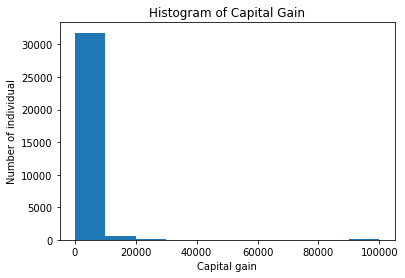

In [6]:
# Q3: Distribution of capital_gain
plt.hist(income94.capital_gain)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital gain')
plt.ylabel('Number of individual')
plt.show()

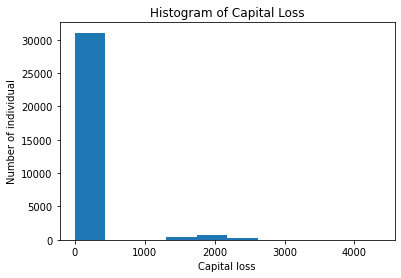

In [7]:
# Q3: Distribution of capital_loss
plt.hist(income94.capital_loss)
plt.title('Histogram of Capital Loss')
plt.xlabel('Capital loss')
plt.ylabel('Number of individual')
plt.show()

**Q3: Individually plot the distributions of ​capital_gain​ and ​capital_loss​. Should these variables be transformed? Why/why not? If yes, create a new variable for either that should be transformed and plot or describe in a table the distribution of the new categorical variable.**

A: These variables should be transformed into log capital gain/loss since a log-transformation would remove or reduce the skewness of the data and provides better interpretation. Also, there is a huge number of zeros, which makes the graph heavily right-skewed and could not perform log-transformation on the zeros, therefore, I decided to remove all zeros and perform log-transformation on the remaining data.

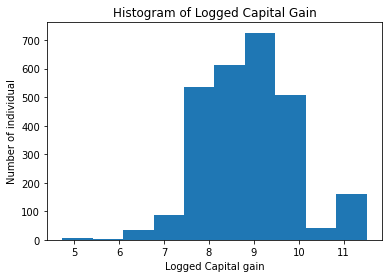

In [8]:
# Logged capital gain
gain = income94[income94.capital_gain > 0]
plt.hist(np.log(gain.capital_gain))
plt.title('Histogram of Logged Capital Gain')
plt.xlabel('Logged Capital gain')
plt.ylabel('Number of individual')
plt.show()

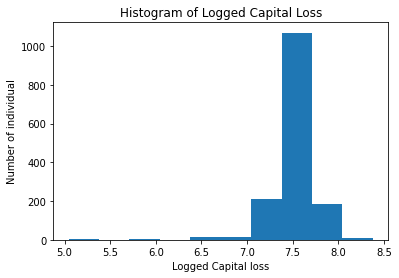

In [9]:
# Logged capital loss
loss = income94[income94.capital_loss > 0]
plt.hist(np.log(loss.capital_loss))
plt.title('Histogram of Logged Capital Loss')
plt.xlabel('Logged Capital loss')
plt.ylabel('Number of individual')
plt.show()